## Try to replicate SMT

In [1]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from tools import *


# Check that MPS is available
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("MPS is enabled!")
elif torch.cuda.is_available():
    device = torch.device("cuda")


MPS is enabled!


### 1. Generate data from Archimedean spiral

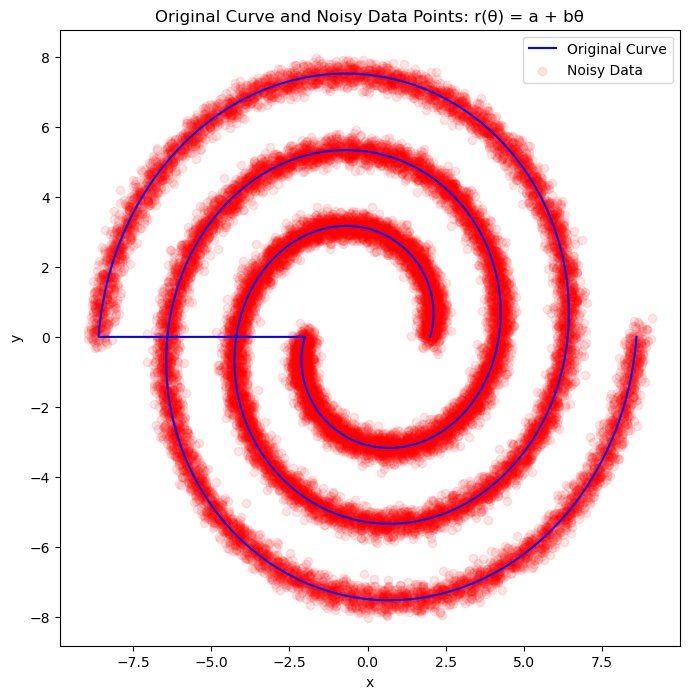

In [2]:
data = GenerateDataset()

## Sparse coding

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

class SparseCoding(nn.Module):
    def __init__(self, data_size, activ_dim, basisfunc_num, sparsity_level):
        super(SparseCoding, self).__init__()
        self.Basis = nn.Parameter(torch.randn(basisfunc_num, activ_dim)) # para 1
        self.Activ = nn.Parameter(torch.randn(data_size, basisfunc_num)) # para 2
        self.sparsity_level = sparsity_level

    # x does not matter
    def forward(self, x):
        # Compute the reconstruction error
        reconstruction = self.Activ @ self.Basis
        sparsity_penalty = self.sparsity_level * torch.norm(reconstruction, p=1)
        return reconstruction, sparsity_penalty
    
    def plot_basis(self):
        # Plotting in polar coordinates
        plt.figure(figsize=[6, 6])

        # Detach the tensor before converting to numpy
        basis_np = self.Basis.detach().numpy()

        # plot dictionary elements
        ax = plt.subplot(111)
        ax.scatter(basis_np[:, 0], basis_np[:, 1], label='Noisy Data', color='red', alpha=0.1)

        # Setting the title and labels
        ax.set_title("Landmarks learnt by Sparse coding")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.legend()

        # Show the plot
        plt.show()


data_tenor = torch.tensor(data, dtype=torch.float)
# Create an instance of SparseCoding model
model = SparseCoding(data_size=data_tenor.shape[0], activ_dim=data_tenor.shape[1], basisfunc_num=100, sparsity_level=0)



In [4]:
# Define loss function
criterion = nn.MSELoss()

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Number of optimization steps
num_epochs = 10000

print(data_tenor.shape)
# Training loop
for epoch in range(num_epochs):
    # Forward pass
    reconstruction, sparsity_penalty = model(0)

    # Compute the reconstruction loss
    reconstruction_loss = criterion(reconstruction, data_tenor)
    
    # Total loss = Reconstruction loss + Sparsity penalty
    loss = reconstruction_loss + sparsity_penalty
    
    # Zero gradients, perform a backward pass, and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Reconstruction Loss: {reconstruction_loss.item():.4f}, Sparsity Penalty: {sparsity_penalty.item():.4f}')

# After training, you can use the learned dictionary to encode new data
encoded_data = model.Activ @ model.Basis
print("Encoded data shape:", encoded_data.shape)


print(model.Basis.shape)

model.plot_basis()



torch.Size([21600, 2])
Epoch [10/10000], Reconstruction Loss: 40.9294, Sparsity Penalty: 0.0000
Epoch [20/10000], Reconstruction Loss: 11.7820, Sparsity Penalty: 0.0000
Epoch [30/10000], Reconstruction Loss: 3.6319, Sparsity Penalty: 0.0000
Epoch [40/10000], Reconstruction Loss: 1.2685, Sparsity Penalty: 0.0000
Epoch [50/10000], Reconstruction Loss: 0.4553, Sparsity Penalty: 0.0000
Epoch [60/10000], Reconstruction Loss: 0.1621, Sparsity Penalty: 0.0000
Epoch [70/10000], Reconstruction Loss: 0.0584, Sparsity Penalty: 0.0000
Epoch [80/10000], Reconstruction Loss: 0.0209, Sparsity Penalty: 0.0000
Epoch [90/10000], Reconstruction Loss: 0.0073, Sparsity Penalty: 0.0000
Epoch [100/10000], Reconstruction Loss: 0.0025, Sparsity Penalty: 0.0000
Epoch [110/10000], Reconstruction Loss: 0.0008, Sparsity Penalty: 0.0000
Epoch [120/10000], Reconstruction Loss: 0.0003, Sparsity Penalty: 0.0000
Epoch [130/10000], Reconstruction Loss: 0.0001, Sparsity Penalty: 0.0000
Epoch [140/10000], Reconstruction L

KeyboardInterrupt: 